# Step One Photon Number Discrimination
* Determine the height thresholds for 2 level discrminator
* Obtain area histogram of traces
* Use area histogram to categorise photon number in traces

Output files:
List of n=1 traces
List of n=2 traces
Data file with:
    Height threshold
    Noise threshold
    n=1 integral center
    n=2 integral limits

In [2]:
from __future__ import division
import tqdm
import os
import sys
sys.path.append('/mnt/disk0/home/jianwei_leejw/scripts/TESPulseFitCode')

import math
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import pickle
from multiprocess import Pool

import seaborn

import trace_param as tp
import heralded_pulses_analysis as hpa
import thres_poiss
import thres
import pulse_utils as pu
reload(pu)

<module 'pulse_utils' from '/mnt/disk0/home/jianwei_leejw/scripts/TESPulseFitCode/pulse_utils.pyc'>

In [3]:
# Imports CW traces
directories = ['/mnt/disk1/data/20170523_TES5_75mK_95uA_trise_115ns/doubles/',
              '/mnt/disk1/data/20170523_TES5_75mK_95uA_trise_115ns/doubles_more/',
              '/mnt/disk1/data/20170523_TES5_75mK_95uA_trise_115ns/doubles_more_more/',
              '/mnt/disk1/data/20170523_TES5_75mK_95uA_trise_115ns/doubles_more_more_more/']

results_directory = './'
filelist=[]
for directory_name in directories:
    subfilelist = np.array(glob.glob(directory_name + '*.trc'))
    filelist.extend(subfilelist)
filelist = np.sort(np.array(filelist))
print len(filelist)

400000


# Get Approximate Height Threshold
Estimate threshold height to discriminate between electrical noise and photodetection events.

Gets maximum height of pulses, histograms the heights. 

Fit the distributions to a model to find the minimum crossing point between the distributions.

The resolution of this distribution will not be optimal due to the presence of partial pulses at the edges.

In [3]:
sample_size = int(0.1*len(filelist)) # number of samples to obtain height threshold from

In [4]:
reload(tp)
# max_heights = np.array([hpa.max_height(f) for f in tqdm.tqdm(filelist[:sample_size])])
max_heights = np.array(Pool(24).map(hpa.max_height, tqdm.tqdm(filelist[:sample_size])))

100%|██████████| 40000/40000 [00:04<00:00, 9819.70it/s] 
Process PoolWorker-10:
Process PoolWorker-17:
Process PoolWorker-12:
Process PoolWorker-9:
Process PoolWorker-21:
Process PoolWorker-3:
Process PoolWorker-18:
Process PoolWorker-20:
Process PoolWorker-8:
Process PoolWorker-13:
Process PoolWorker-11:
Process PoolWorker-5:
Process PoolWorker-19:
Process PoolWorker-22:
Process PoolWorker-1:
Process PoolWorker-23:
Process PoolWorker-24:
Process PoolWorker-16:
Process PoolWorker-7:
Process PoolWorker-15:
Process PoolWorker-14:
Process PoolWorker-2:
Traceback (most recent call last):
Process PoolWorker-6:
Process PoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most

  File "/usr/local/lib/python2.7/dist-packages/multiprocess/pool.py", line 102, in worker
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/pool.py", line 102, in worker
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/process.py", line 114, in run
    task = get()
    task = get()
    self._target(*self._args, **self._kwargs)
    task = get()
    task = get()
    task = get()
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/pool.py", line 102, in worker
    task = get()
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/process.py", line 114, in run
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/pool.py", line 102, in worker
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/queues.py", line 379, in get
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/queues.py", line 379, in get
    task = get()
    task = get()
    task = get()
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/process.py", line 114, 

In [5]:
bins = 200

In [6]:
height_distribution = np.histogram(max_heights, bins)

In [7]:
frequencies ,binsv = thres.histogram(height_distribution)
binsv[np.where(frequencies==np.min(frequencies[(binsv>0.005)&(binsv<0.015)]))]

array([ 0.00915135,  0.02354657,  0.02372879])

In [19]:
# reload(thres_poiss)
# height_th_approx = thres_poiss.thresholds_N_unnormed(height_distribution, 
#                                             min_peak_sep=0.01, 
#                                             weighted=True)[0]
# print height_th_approx

In [8]:
height_th_approx = 0.00915135

[ 0.00514255  0.0168045 ]
[[Model]]
    (Model(gaussian, prefix='g0_') + Model(gaussian, prefix='g1_'))
[[Variables]]
    A:              6.98315456 +/- 0.105435 (1.51%) (init= 28.93)
    n_bar:          0.38528899 +/- 0.010383 (2.70%) (init= 0.4)
    g0_sigma:       0.00067158 +/- 8.82e-06 (1.31%) (init= 0.002)
    sigma_p:        0.00331870 +/- 7.23e-05 (2.18%) (init= 0.002250791)
    g0_center:      0.00520584 +/- 1.30e-05 (0.25%) (init= 0.00514255)
    g1_center:      0.01587193 +/- 9.04e-05 (0.57%) (init= 0.0168045)
    g0_amplitude:   4.75031894 +/- 0.087058 (1.83%)  == 'A * exp(-n_bar)'
    g1_amplitude:   2.23283562 +/- 0.059738 (2.68%)  == 'A * (1-exp(-n_bar))'
    g1_sigma:       0.00331870 +/- 7.23e-05 (2.18%)  == 'sigma_p'
[[Correlations]] (unreported correlations are <  0.100)
    C(g0_sigma, g0_center)       =  0.297 



<IPython.core.display.Javascript object>


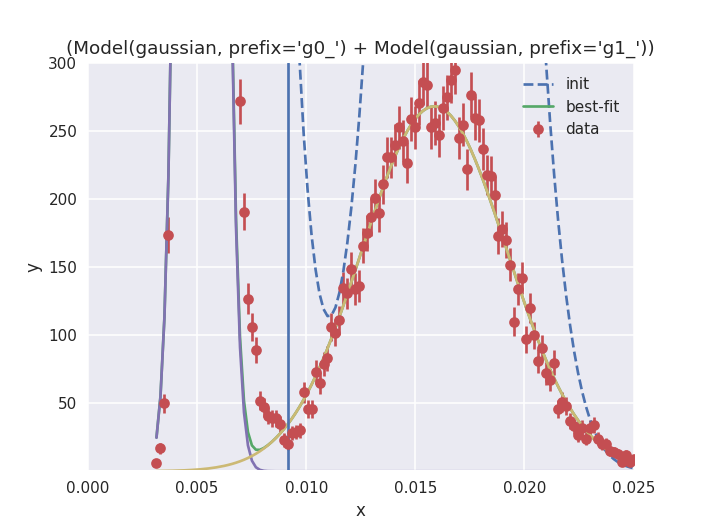

In [9]:
result_height_approx =  thres_poiss.gauss_fit_interp(height_distribution, 
                                  min_peak_sep=0.01,
                                  weighted=True)
print result_height_approx.fit_report()
frequencies ,bins = thres.histogram(height_distribution)
comps = result_height_approx.eval_components(x=bins)
%matplotlib notebook
plt.figure()
plt.title('Maximum Height Distribution (ignoring edges)\nSample size = {}'.format(sample_size))
result_height_approx.plot_fit()
plt.plot(bins,comps['g0_'])
plt.plot(bins,comps['g1_'])
plt.xlim(0,0.025)
plt.ylim(1,300)
plt.axvline(height_th_approx)
# plt.semilogy()
plt.show()

plt.figure()
plt.title('Maximum Height Distribution\nSample size = {}'.format(sample_size))
plt.bar(height_distribution[1][:-1],
        height_distribution[0], 
        width = np.diff(height_distribution[1])[0],
        align='center')
plt.axvline(height_th_approx, label='height_th_approx', linestyle='--')
plt.legend()
plt.show()

# Get Height Threshold (excluding partial pulses)
The maximum height of pulses at the edge of the acquisition window do not report the peak photodetection signal - they are obscured.

We use the approximate height obtained to initialise a two level discriminator.

The discriminator has 3 inputs:
* high_th: the level crossing that identifies the signal as a photodetection event
* low_th: the level crossing that turns the discriminator logic off
* offset: the number of data points that the discriminator window extends, in order to improve the signal to noise ratio

We use param_extr to calculate these values, 
(within discriminated windows, while ignoring partial traces)
* max height 
* rms 
* absolute area 

In [10]:
# Calculate offset value as a function of points
time_vector = pu.time_vector(filelist[0])
dt = np.diff(time_vector)[0]
offset = int(1700e-9/dt)
print offset

850


In [11]:
trace_parameters_approx = np.array(Pool(23).map(lambda f: hpa.param_extr(f,
                                   high_th = height_th_approx,
                                   low_th = 0,
                                   offset = offset),
                                  tqdm.tqdm(filelist[:sample_size])))

100%|██████████| 40000/40000 [00:09<00:00, 4073.67it/s]
Process PoolWorker-39:
Process PoolWorker-37:
Process PoolWorker-36:
Process PoolWorker-25:
Process PoolWorker-38:
Process PoolWorker-46:
Process PoolWorker-33:
Process PoolWorker-28:
Process PoolWorker-34:
Process PoolWorker-40:
Process PoolWorker-30:
Process PoolWorker-35:
Process PoolWorker-31:
Process PoolWorker-26:
Process PoolWorker-45:
Process PoolWorker-27:
Process PoolWorker-42:
Process PoolWorker-47:
Process PoolWorker-43:
Process PoolWorker-29:
Traceback (most recent call last):
Process PoolWorker-41:
Process PoolWorker-32:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-44:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call la

    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/pool.py", line 102, in worker
    task = get()
    task = get()
    task = get()
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/pool.py", line 102, in worker
    task = get()
    task = get()
    task = get()
    self._target(*self._args, **self._kwargs)
    task = get()
    self._target(*self._args, **self._kwargs)
    task = get()
    task = get()
    task = get()
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/queues.py", line 379, in get
    task = get()
    task = get()
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/queues.py", line 379, in get
    task = get()
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/queues.py", line 379, in get
  File "/usr/local/lib/python2.7/dist-packages/multiprocess/pool.py", line 102, in worker
  File "/usr/local/lib/python2.7/dist-packages/multiproces

In [12]:
max_heights_discriminated = trace_parameters_approx['height']

In [13]:
bins = 500
height_distribution_discriminated = np.histogram(max_heights_discriminated, bins)

In [14]:
frequencies ,binsv = thres.histogram(height_distribution_discriminated)
binsv[np.where(frequencies==np.min(frequencies[(binsv>0.0075)&(binsv<0.0125)]))]

array([ 0.00304169,  0.00917124,  0.00924421,  0.00953609,  0.0240573 ,
        0.02449513,  0.0245681 ,  0.02471404,  0.02537078,  0.02544375,
        0.02558969,  0.02602751,  0.02610048,  0.0263194 ,  0.02668425,
        0.02697614,  0.02719505,  0.0275599 ,  0.02763287,  0.02770584,
        0.02836258,  0.02865447,  0.0293112 ,  0.029822  ,  0.03011388,
        0.03040577,  0.03055171,  0.03069765,  0.03120845,  0.03128142,
        0.03135439,  0.03179221,  0.0320841 ,  0.03223004,  0.03288678,
        0.03295975,  0.03390837,  0.03405431,  0.03412728,  0.03573264])

In [15]:
reload(thres_poiss)

result_height =  thres_poiss.gauss_fit_interp(height_distribution_discriminated, 
                                  min_peak_sep=0.01,
                                  weighted=True)

height_th = thres_poiss.thresholds_N_unnormed(height_distribution_discriminated, 
                                            min_peak_sep=0.01, 
                                            weighted=True)
print result_height.fit_report()
height_th = height_th[0]
height_th

[ 0.00523081  0.01551971]
[ 0.00523081  0.01551971]
[[Model]]
    (Model(gaussian, prefix='g0_') + Model(gaussian, prefix='g1_'))
[[Variables]]
    A:              2.75949341 +/- 0.030018 (1.09%) (init= 12.69)
    n_bar:          0.29636205 +/- 0.006395 (2.16%) (init= 0.4)
    g0_sigma:       0.00066801 +/- 5.95e-06 (0.89%) (init= 0.002)
    sigma_p:        0.00305536 +/- 5.05e-05 (1.65%) (init= 0.002250791)
    g0_center:      0.00520567 +/- 8.88e-06 (0.17%) (init= 0.005230812)
    g1_center:      0.01602607 +/- 6.62e-05 (0.41%) (init= 0.01551971)
    g0_amplitude:   2.05173353 +/- 0.025893 (1.26%)  == 'A * exp(-n_bar)'
    g1_amplitude:   0.70775988 +/- 0.015212 (2.15%)  == 'A * (1-exp(-n_bar))'
    g1_sigma:       0.00305536 +/- 5.05e-05 (1.65%)  == 'sigma_p'
[[Correlations]] (unreported correlations are <  0.100)
    C(g0_sigma, g0_center)       =  0.300 



0.0075658800680570961

In [16]:
# frequencies ,bins = thres.histogram(height_distribution_discriminated)
comps = result_height.eval_components(x=binsv)

<IPython.core.display.Javascript object>


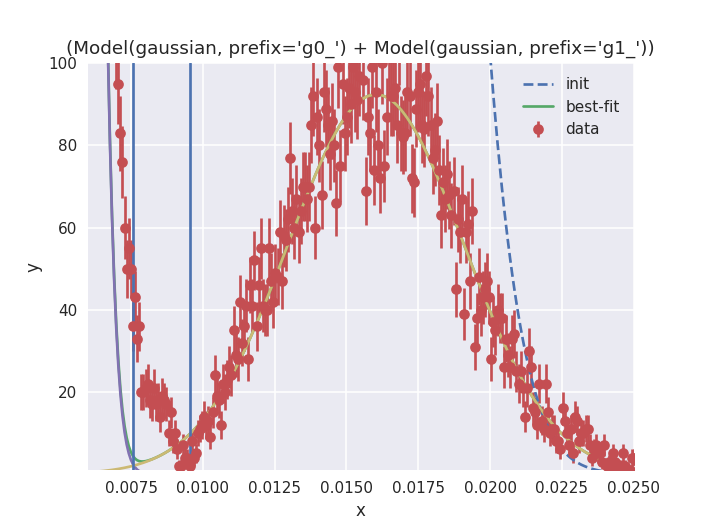

In [18]:
%matplotlib notebook
plt.figure()
plt.title('Maximum Height Distribution (ignoring edges)\nSample size = {}'.format(sample_size))
result_height.plot_fit()
plt.plot(binsv,comps['g0_'])
plt.plot(binsv,comps['g1_'])
plt.xlim(0.006,0.025)
plt.ylim(1,100)
plt.axvline(height_th)
plt.axvline(0.00953609)
# plt.semilogy()
plt.show()

In [19]:
height_th = 0.00953609

In [20]:
# t = 0.0079408483085594457 #threshold using likelihood
t = height_th #threshold using posterior
thres_bin = hpa.find_idx(bins,t)
noise = int(np.sum(comps['g0_'][thres_bin:]))
signal_lost = int(np.sum(comps['g1_'][:thres_bin]))
signal_total = int(np.sum(comps['g1_']))
print noise, signal_lost, signal_total

28103 0 9699


In [21]:
np.savetxt('max_heights_discriminated.dat',max_heights_discriminated)
np.savetxt('pnr_height.dat',thres.histogram(height_distribution_discriminated))
np.savetxt('g0_component.dat',comps['g0_'])
np.savetxt('g1_component.dat',comps['g1_'])
with open('pnr_height_readme.dat','w+') as fp:
    fp.write('height_th = {}\n samples = {}'.format(height_th,sample_size))
fp.close()

# Calculate trace parameters with height threshold (obtained excluding partial pulses)
* Computes trace parameters for ALL traces
* Speeds up tasks with multiprocessing

In [61]:
# Import/Set discriminator settings
# if os.path.isfile(results_directory + 'disc_settings.dat'):
[height_th, offset] = np.loadtxt(results_directory + 'disc_settings.dat')
offset = int(offset)

In [22]:
# saves discriminator characteristics
np.savetxt(results_directory + 'disc_settings.dat', [height_th, offset],header='height_th\toffset')

In [23]:
print height_th, offset

0.00953609 850


In [24]:
reload(hpa)
tasks = tqdm.tqdm(filelist[:])
def param_extr_poolable(f):
    """poolable version of parameter extractor"""
    return hpa.param_extr(f,
                   high_th = height_th,
                   low_th = 0,
                   offset = offset)

  0%|          | 0/400000 [00:00<?, ?it/s]

In [4]:
# reload(hpa)
reload(pu)
# if os.path.isfile(results_directory + 'trace_params.dat'):
trace_parameters = np.genfromtxt(results_directory + 'trace_params.dat', names=True)
# else:
#     trace_parameters = np.array(Pool(23).map(param_extr_poolable, tasks))
# trace_parameters = np.array(Pool(23).map(param_extr_poolable, tasks))

In [5]:
print trace_parameters.dtype.names
area = trace_parameters['area_win_abs']
numedges = trace_parameters['numedges']

('filename', 'numedges', 'area_win', 'area_win_abs', 'height', 'rms', 'bg_mv')


In [6]:
e1 = numedges==1
e2 = numedges==2
e3 = numedges==3
a1 = area[e1]
a2 = area[e2]
a3 = area[e3]
np.savetxt('AbsArea_1Edge.dat',a1)
np.savetxt('AbsArea_2Edge.dat',a2)
np.savetxt('AbsArea_3Edge.dat',a3)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


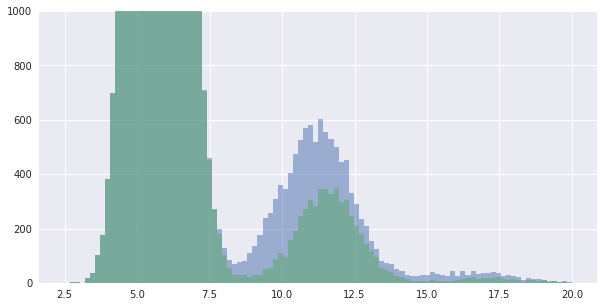

In [7]:
plt.figure(figsize=(10,5))
plt.hist(area,100,range=(2.5,20),label='all',alpha=0.5)
plt.hist(a1,100,range=(2.5,20),label='1edge',alpha=0.5);
# plt.hist(a2,100,range=(2.5,20),label='2edges');
# plt.hist(a3,100,range=(2.5,20),label='3edges');
plt.ylim(1,1000)
# plt.semilogy()
plt.show()

In [10]:
trace_parameters['filename'][0]

nan

# Fit Area Distribution
* Select traces with number of edges = 1: we are only interested in traces occuring within the disrciminator window, traces which are overlapped.
* Threshold (th01) between n=0, n=1 determined by seeking the minimum between the two distributions.
* N >= 1 distributions fitted with Gaussian multiplied by Poisson coefficients
* N=1 distribution is selected to be within 2 sigmas of its distribution.
* N=2 distribution selected to be within th12 and th23

In [40]:
bins = 200
lims = (0,20)
area_distribution = np.histogram(area, bins) 

In [9]:
# Count n=1 traces
# frequencies ,binsv = thres.histogram(area_distribution)
# p1 = np.sum(f[(binsv>2.5)&(binsv<9.45)])/400000
# print 'p(n=1) =', p1

In [71]:
def nbar(frequencies,bins,height_th):
    """
    nbar estimate from n0 population.
    initially, plan was to get n0 from height distribution: -np.log((40000-9649)/40000)
    however, the nbar obtained from the n=1 population from the area distribution (with only 1 edge) 
    predicted an n=2 population from the area distribution (with both 1 and 2 edges)
    """
    n0 = np.sum(frequencies[bins<=height_th])
    n = np.sum(frequencies)
    print n0/n
    return -np.log(n0/n)
def poiss(k,nbar):
    return nbar**k*np.exp(-nbar)/math.factorial(k)

In [72]:
# use p(n=1) from the area distribution[numedges==1] to estimate nbar
print poiss(1,0.2525)
print poiss(2,0.2525)*400000

0.196156193742
9905.88778397


In [73]:
# %matplotlib notebook
# plt.figure()
# plt.hist(area[numedges==1],100,range=(1,20),alpha=0.2,normed=False,label='1 edge')
# plt.hist(area[(numedges==1)|(numedges==2)],100,range=(1,20),alpha=0.2,normed=False,label='1 or 2 edges')
# plt.hist(area[~((numedges==1)&(area<9.2))],100,range=(1,20),alpha=0.2,normed=False, label='less n=0,1')
# plt.ylim(1,200)
# plt.xlim(8,15)
# plt.legend()
# plt.show()

In [74]:
# print nbar(frequencies,bins,0.0097), poiss(2,0.253)*400000
# print -np.log((40000-9649)/40000)
# print poiss(1,0.253)

est peak pos = [  5.75156359  11.3693699   16.9871762   22.06995333]
est peak hts = [5890  454   32    5]
th01 = 2.35
poissonian probs from n=1,2...= [0.19160290247976067, 0.02344547215153556, 0.0019126020788976794, 0.00011701769179227668]


<IPython.core.display.Javascript object>


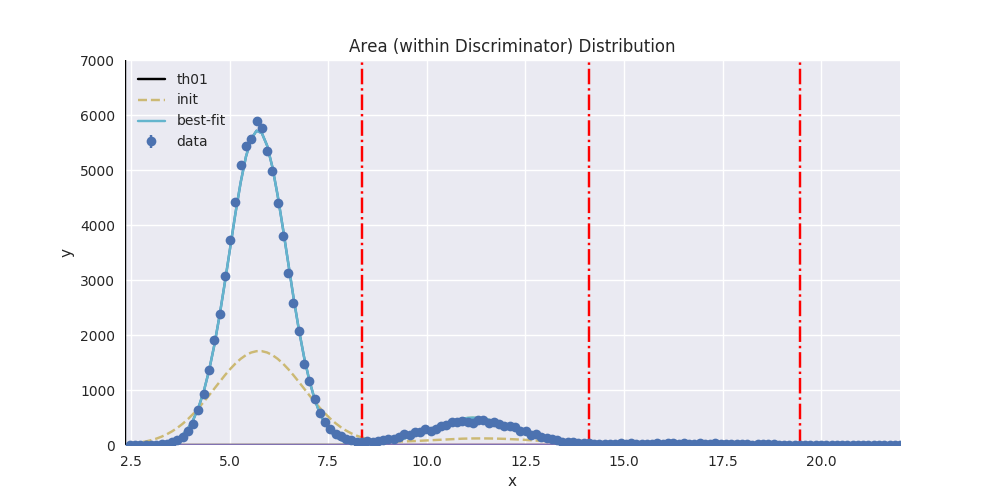

[[Model]]
    (((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(gaussian, prefix='g4_'))
[[Variables]]
    n_bar:          0.24472982 (init= 0.2)
    A:              54745.8843 (init= 29450)
    Delta_E:        40.7247397 (init= 5)
    sigma_p:        0.73137543 (init= 1.125395)
    g1_center:      5.72250770 (init= 5.751564)
    g2_center:      11.1620228 (init= 11.36937)
    g3_center:      16.3642502 (init= 16.98718)
    g4_center:      20.1704224 (init= 22.06995)
    g1_amplitude:   10489.4703  == 'A * exp(-n_bar) * n_bar**1 / factorial(1)'
    g2_amplitude:   1283.54310  == 'A * exp(-n_bar) * n_bar**2 / factorial(2)'
    g3_amplitude:   104.707092  == 'A * exp(-n_bar) * n_bar**3 / factorial(3)'
    g4_amplitude:   6.40623701  == 'A * exp(-n_bar) * n_bar**4 / factorial(4)'
    g1_sigma:       0.73137543  == 'sigma_p * sqrt(1)'
    g2_sigma:       1.03432106  == 'sigma_p * sqrt(2)'
    g3_sigma:       1.26677941  == 'sigma_p *

In [41]:
%matplotlib notebook
reload(thres)
result = thres.gauss_fit_poiss_ph_region(area_distribution,
                                         th01 = 2.35,
                                          min_peak_sep=5, 
                                          threshold=5e-5, 
                                          weighted=True,
                                          plot=True)
result.plot_fit()
plt.title('Area (within Discriminator) Distribution')
plt.ylim(1,7000)
plt.xlim(2.35,22)
# plt.semilogy()
plt.show()

plt.figure()
plt.hist(area_prev[:50000],100,histtype='step',label='previous');
plt.hist(area_prev[-50000:],100,histtype='step');
plt.ylim(0,500)
plt.xlim(6,15)
plt.legend()
plt.show()

In [15]:
print result.best_values['g2_center']/result.best_values['g1_center']
print result.best_values['g3_center']/result.best_values['g1_center']

1.95014843366
2.86685843627


In [42]:
reload(thres)
thresholds_unnormed = thres.thresholds_N_unnormed(area_distribution,
                                          th01=2.35,
                                          min_peak_sep=5, 
                                          threshold=5e-5, 
                                          weighted=True,
                                          )
print thresholds_unnormed
ax = plt.gca(); map(lambda t: ax.axvline(t, linestyle='-.',color='red'),thresholds_unnormed); #plot thresholds in area distribution

est peak pos = [  5.75156359  11.3693699   16.9871762   22.06995333]
est peak hts = [5890  454   32    5]
th01 = 2.35
poissonian probs from n=1,2...= [0.19160290247976067, 0.02344547215153556, 0.0019126020788976794, 0.00011701769179227668]
[8.3598308058260749, 14.111394400234415, 19.461686115963101]


In [43]:
th01 = 2.35

In [44]:
frequencies ,bins = thres.histogram(area_distribution)
comps = result.eval_components(x=bins)

In [45]:
t = thresholds_unnormed[0] #threshold
thres_bin = hpa.find_idx(bins,t)
noise = int(np.sum(comps['g1_'][thres_bin:]))
signal_lost = int(np.sum(comps['g2_'][:thres_bin]))
signal_total = int(np.sum(comps['g2_']))
print noise, signal_lost, signal_total

16 26 9596


## Save PNR

In [46]:
np.savetxt('pnr_area_disc.dat',thres.histogram(area_distribution))
np.savetxt('g1_area_component.dat',comps['g1_'])
np.savetxt('g2_area_component.dat',comps['g2_'])
np.savetxt('g3_area_component.dat',comps['g3_'])
with open('pnr_area_readme.dat','w+') as fp:
    fp.write('a_th01 = {}\n a_th12 = {}\n a_th23 = {}'.format(th01,thresholds_unnormed[0],thresholds_unnormed[1]))
fp.close()

In [32]:
bins = 200
area_above_threshold = trace_parameters['area_win']
area_above_threshold_distribution = np.histogram(area_above_threshold, bins) 
frequencies, bins = thres.histogram(area_above_threshold_distribution)
np.savetxt('pnr_area_above_th.dat',thres.histogram(area_above_threshold_distribution))

# Photon Number Masks
* creates mask for photon numbers

In [120]:
mask_0ph = (area < th01)

In [121]:
# single photon mask: 
# within 2 std deviations of mean single-photon area to exclude outliers corresponding to more false positives 
mask_1ph = (area > result.best_values['g1_center']-2*result.best_values['g1_sigma'])&\
           (area < result.best_values['g1_center']+2*result.best_values['g1_sigma'])
# two photon mask:
# within thresholds corresponding to minimal overlap between n=1 and n=3 photons
mask_2ph = (area > thresholds_unnormed[0])&(area < thresholds_unnormed[1])

In [122]:
print sum(mask_2ph)

9943


# Save filelists and fit results

In [123]:
# saves filelist of n = 0, 1, 2 photons
hpa.append2file(results_directory + 'filelist_zero_photon.dat',"\n".join(filelist[mask_0ph]))
hpa.append2file(results_directory + 'filelist_single_photon.dat',"\n".join(filelist[mask_1ph]))
hpa.append2file(results_directory + 'filelist_two_photon.dat',"\n".join(filelist[mask_2ph]))

In [124]:
# saves fit results of area distribution
f = open(results_directory + 'area_distribution_lmfit_result.dat','wb')
pickle.dump(result,f)
f.close()

In [126]:
# saves thresholds(point of minimal overlap) between number distributions 
th_areas_from_min_overlap = np.array(np.insert(thresholds_unnormed,0,th01))
np.savetxt(results_directory+'th_areas_from_min_overlap.dat',th_areas_from_min_overlap,header='\t'.join(['th01,th12,th23']))

In [127]:
# saves whole filelist and trace parameters for future reference
hpa.append2file(results_directory + 'filelist.dat',"\n".join(filelist))
np.savetxt(results_directory + 'trace_params.dat',
           trace_parameters,
           header="\t".join(trace_parameters.dtype.names),
           fmt=('%s %d %.18e %.18e %.18e %.18e %.18e')
          )

In [128]:
# saves fit result of height distribution
g = open(results_directory + 'height_distribution_lmfit_result_height_th_{}.dat'.format(height_th),'wb')
pickle.dump(result_height,g)
g.close()

# Calculate RMS noise of n=0 traces

In [129]:
a = np.genfromtxt(results_directory + 'filelist_zero_photon.dat', delimiter='\n',dtype='string')

In [130]:
test = np.genfromtxt('trace_params.dat',
                    dtype=[('filename', 'U256'),
                           ('numedges', 'int8'),
                        ('area_win', 'float64'),
                        ('area_win_abs', 'float64'),
                       ('height', 'float64'),
                       ('rms', 'float64'),
                       ('bg_mv', 'float64')
                       ])

In [131]:
print test[0]

(u'/mnt/disk1/data/20170523_TES5_75mK_95uA_trise_115ns/doubles/C2doubles00000.trc', 0,  0.,  0.,  0.00460016,  0.00166186,  0.)


In [133]:
rms = np.mean(trace_parameters['rms'][mask_0ph])
np.savetxt(results_directory + 'rms.dat', 
           [rms],
           header='rms')
print rms

0.00175190254578
